In [17]:

import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import os
FOLDER = "figures"
# put jax in cpu mode
jax.config.update("jax_platform_name", "cpu")

paths = [
    "results/20241022-180548-MNIST-t=1-e=1000-opt=bgd",
    "results/20241022-223538-MNIST-t=1-e=1000-opt=mesu"
]
n_iterations = 5
n_tasks = 1
n_epochs = 1000
n_layers = 2
data = []
for path in paths:
    full_accuracies = []
    full_roc_aucs = []
    full_sigma_mean = []
    for it in range(n_iterations):
        current_it_path = os.path.join(path, f"config{it}")
        accuracy_path = os.path.join(current_it_path, "accuracy")
        uncertainty_path = os.path.join(current_it_path, "uncertainty")
        weights_path = os.path.join(current_it_path, "weights")
        
        accuracies = []
        roc_aucs = []
        sigma_mean = []
        for task in range(n_tasks):
            for epoch in range(n_epochs):
                suffix = f"task={task}-epoch={epoch}.npy"
                accuracies.append(jnp.load(os.path.join(accuracy_path, suffix)))
                roc_aucs.append(jnp.load(os.path.join(uncertainty_path, "roc-auc-"+suffix)))
                sigma_mean.append(jnp.load(os.path.join(weights_path, "param-sigma-"+suffix))  )
        accuracies = jnp.array(accuracies)
        roc_aucs = jnp.array(roc_aucs)
        sigma_mean = jnp.array(sigma_mean)
        full_accuracies.append(accuracies)
        full_roc_aucs.append(roc_aucs)
        full_sigma_mean.append(sigma_mean)
    full_accuracies = jnp.array(full_accuracies)
    full_roc_aucs = jnp.array(full_roc_aucs)
    full_sigma_mean = jnp.array(full_sigma_mean)
    data.append((full_accuracies, full_roc_aucs, full_sigma_mean))

/tmp/ipykernel_610386/1532420969.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap("viridis", 3)


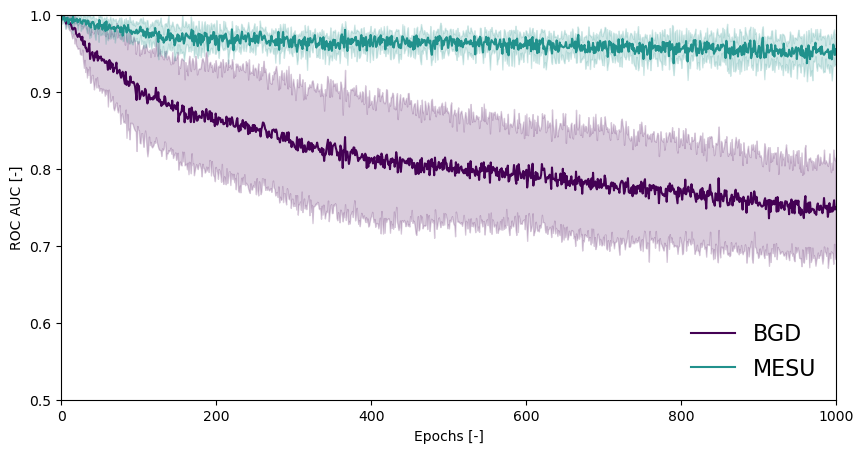

In [21]:
# for each algorithm in data

names = ["BGD", "MESU"]
fig, ax = plt.subplots(figsize=(10, 5))
for i, alg, name in zip(range(len(data)), data, names):
    # make a plot with twinx
    colormap = plt.cm.get_cmap("viridis", 3)
    full_roc = alg[1]
    full_roc_mean = jnp.mean(full_roc, axis=0)
    full_roc_std = jnp.std(full_roc, axis=0)
    ax.plot(full_roc_mean, color=colormap(i),label=name)
    ax.fill_between(jnp.arange(n_epochs), full_roc_mean - full_roc_std, full_roc_mean + full_roc_std, color=colormap(i), alpha=0.2)
    ax.set_xlim(0, n_epochs)
    ax.set_ylim(0.5, 1) 
    ax.set_xlabel("Epochs [-]")
    ax.set_ylabel("ROC AUC [-]")
    ax.legend(loc="lower right", fontsize=16, frameon=False)
    
plt.show()
# savefig as pdf
fig.savefig(os.path.join(FOLDER, "roc-auc-spine.pdf"), bbox_inches="tight")
plt.close()

/tmp/ipykernel_610386/3592433255.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap("viridis", 3)


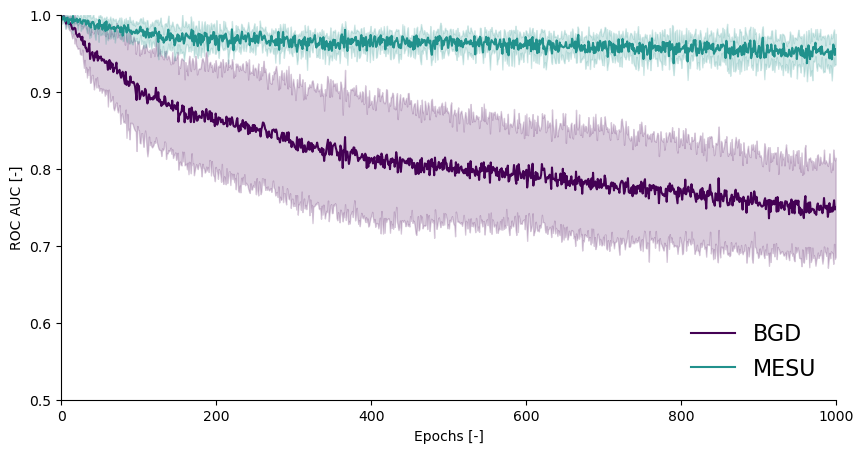

In [22]:
# for each algorithm in data

names = ["BGD", "MESU"]
fig, ax = plt.subplots(figsize=(10, 5))
for i, alg, name in zip(range(len(data)), data, names):
    # make a plot with twinx
    colormap = plt.cm.get_cmap("viridis", 3)
    full_roc = alg[1]
    full_roc_mean = jnp.mean(full_roc, axis=0)
    full_roc_std = jnp.std(full_roc, axis=0)
    ax.plot(full_roc_mean, color=colormap(i),label=name)
    ax.fill_between(jnp.arange(n_epochs), full_roc_mean - full_roc_std, full_roc_mean + full_roc_std, color=colormap(i), alpha=0.2)
    ax.set_xlim(0, n_epochs)
    ax.set_ylim(0.5, 1) 
    ax.set_xlabel("Epochs [-]")
    ax.set_ylabel("ROC AUC [-]")
    # remove splines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)   
    ax.legend(loc="lower right", fontsize=16, frameon=False)
    
plt.show()
# savefig as pdf
fig.savefig(os.path.join(FOLDER, "roc-auc-spineless.pdf"), bbox_inches="tight")
plt.close()
    